# Cluster Analysis on customer engagement from Thai Facebook Live Sellers

In [118]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load in the libraries and the dataset

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt 

In [120]:
df = pd.read_csv(r"C:\Users\megan\Desktop\ST3189Coursework\Clustering - Unsupervised Learning\Live_20210128 (1).csv") 
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [68]:
# Sum of number of cells that are empty
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

4 redundant columns are observed in the dataset. They will be dropped before proceeding further.

In [121]:
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [71]:
# statistical summary of data
df.describe() 

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# Exploratory Data Analysis

### Exploring Catergorical Variables (status_id, status_published & status_type)

In [72]:
df['status_id'].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050], dtype=int64)

In [73]:
len(df['status_id'].unique())

7050

It is observed that it is a unique idenitifier as number of status_id labels is equal to number of instances in dataset.

In [52]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [74]:
len(df['status_published'].unique())

6913

There are 6913 unique labels for status_published variable out of the 7050 total instances in the dataset. Thus, this is aproxinately a unique identifier for each instance.

In [75]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Since there only 4 unique categorical labels for status_type variable out of the 7050 instances in the dataset. It can be used.

As status_id and status_published is redundant, they will be dropped.

In [122]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [123]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


### Proportion of status_type for num_reactions

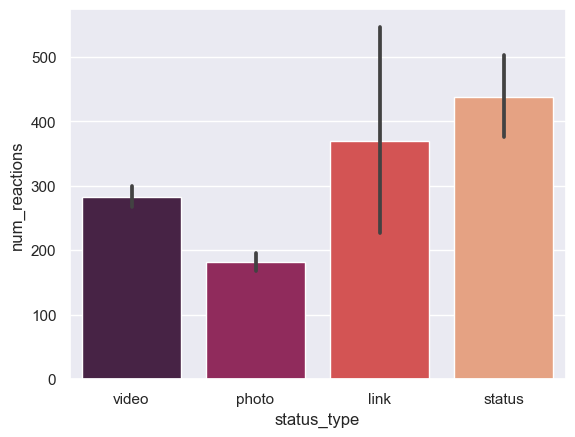

In [57]:
num_reactions = sns.barplot(x='status_type', y='num_reactions', data=df, palette='rocket')

### Proportion of status_type for num_comments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


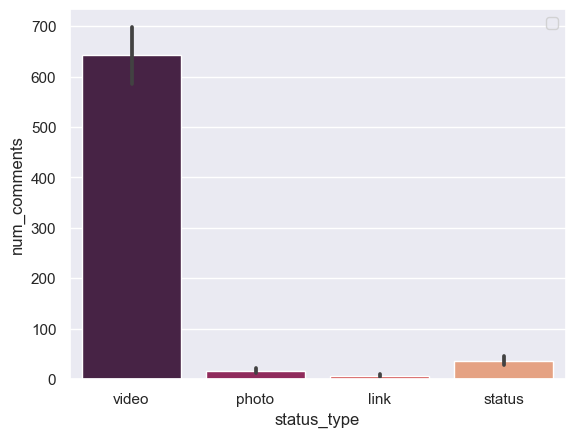

In [37]:
num_comments = sns.barplot(x='status_type', y='num_comments', data=df, palette='rocket')

### Proportion of status_type for num_shares

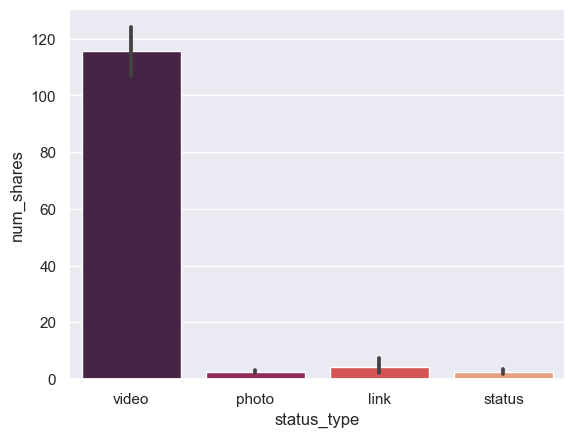

In [38]:
num_shares = sns.barplot(x='status_type', y='num_shares', data=df, palette='rocket')

### Proportion of status_type for num_likes

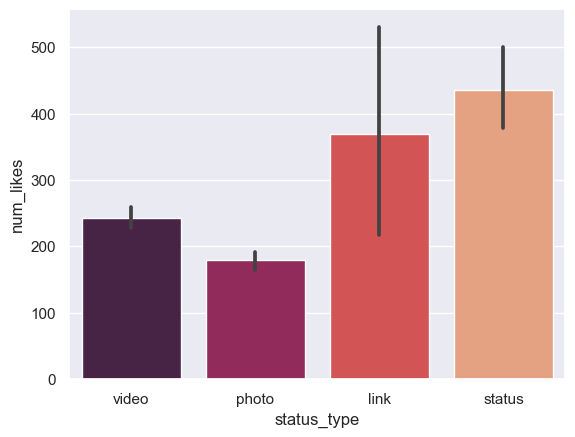

In [39]:
num_likes = sns.barplot(x='status_type', y='num_likes', data=df, palette='rocket')

### Proportion of status_type for num_loves

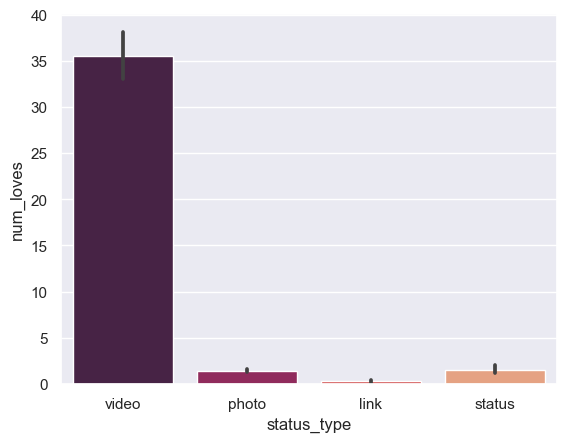

In [40]:
num_loves = sns.barplot(x='status_type', y='num_loves', data=df, palette='rocket')

### Proportion of status_type for num_wows

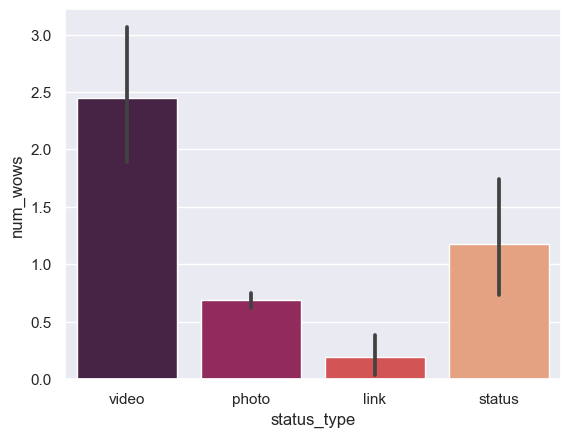

In [59]:
num_wows = sns.barplot(x='status_type', y='num_wows', data=df, palette='rocket')

### Proportion of status_type for num_hahas

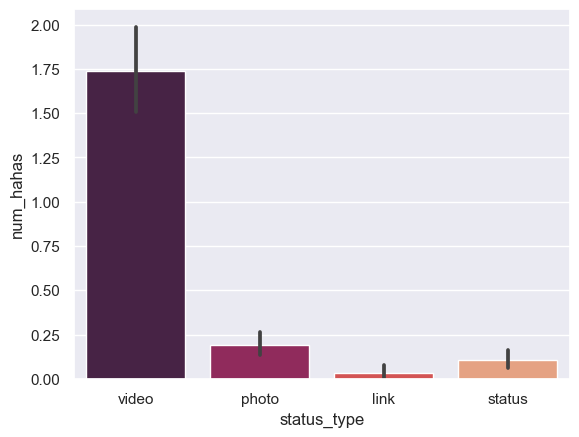

In [42]:
num_hahas = sns.barplot(x='status_type', y='num_hahas', data=df, palette='rocket')

### Proportion of status_type for num_sads

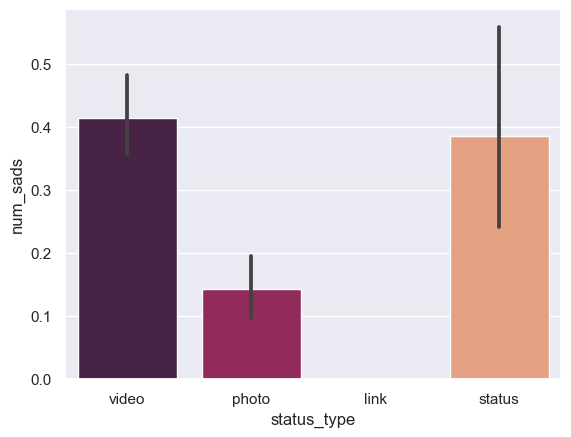

In [43]:
num_sads = sns.barplot(x='status_type', y='num_sads', data=df, palette='rocket')

### Proportion of status_type for num_angrys

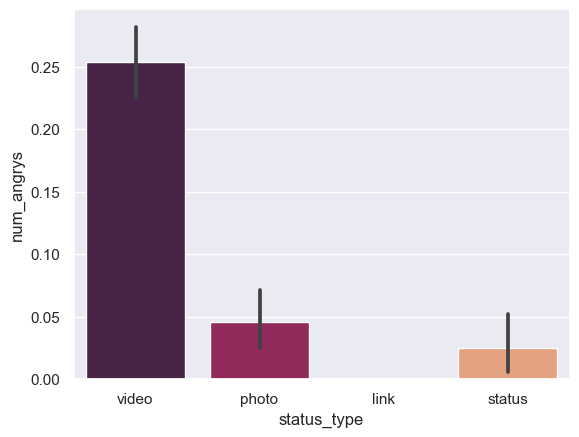

In [44]:
num_angrys = sns.barplot(x='status_type', y='num_angrys', data=df, palette='rocket')

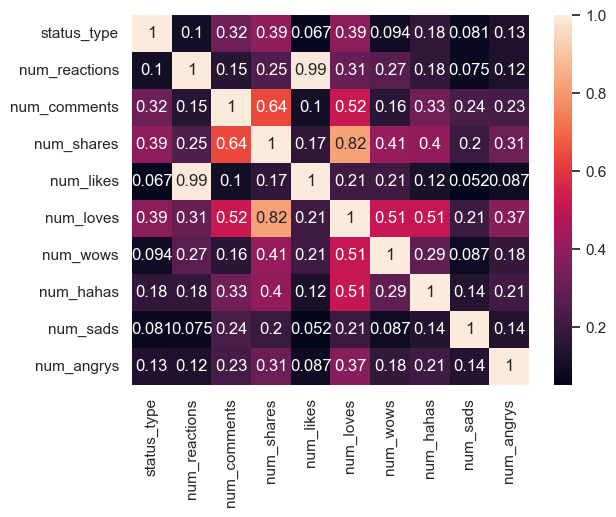

In [85]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot= True) 
plt.show()

# feature vector and target variable

In [124]:
# Dropping irrelevant data columns from features 
x = df.drop(['status_type'], axis=1)
##setting variable target to be the intended target of ML model
y = df['status_type']

# Convert catergorical variable to integer

In [125]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['status_type'] = le.fit_transform(df['status_type'])
y = le.transform(y)

In [126]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Feature Scaling

In [127]:
cols = x.columns
from sklearn.preprocessing import MinMaxScaler 
ms = MinMaxScaler() 
x = ms.fit_transform(x) 
x = pd.DataFrame(x, columns=[cols]) 
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means model

In [128]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(x)

C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [129]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [130]:
kmeans.inertia_

99.50082638379935

In [149]:
labels = kmeans.labels_ # check how many of the samples were correctly labeled 
k2correct_labels = sum(y == labels) 
print("Result: %d out of 7050 samples were correctly labeled." % (k2correct_labels))

Result: 789 out of 7050 samples were correctly labeled.


In [150]:
print('Accuracy score: {0:0.2f}'. format(k2correct_labels/float(y.size)))

Accuracy score: 0.11


## Elbow method to find optimal number of clusters

C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\megan\anaconda3\lib\site-packages\sklea

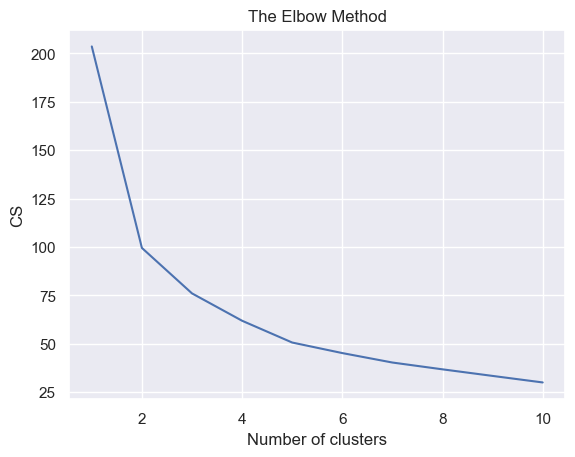

In [112]:
cs = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300) 
    kmeans.fit(x) 
    cs.append(kmeans.inertia_) 
plt.plot(range(1, 11), cs) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('CS') 
plt.show()

## K_means model with different clusters

In [151]:
##K-Means model with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(x) 
# check how many of the samples were correctly labeled 
labels = kmeans.labels_ 
k3correct_labels = sum(y == labels) 
print("Result: %d out of 7050 samples were correctly labeled." % (k3correct_labels)) 
print('Accuracy score: {0:0.2f}'. format(k3correct_labels/float(y.size)))

Result: 261 out of 7050 samples were correctly labeled.
Accuracy score: 0.04


C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [152]:
##K-Means model with 4 clusters 
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(x) 
# check how many of the samples were correctly labeled 
labels = kmeans.labels_ 
k4correct_labels = sum(y == labels) 
print("Result: %d out of 7050 samples were correctly labeled." % (k4correct_labels)) 
print('Accuracy score: {0:0.2f}'. format(k4correct_labels/float(y.size)))

Result: 1127 out of 7050 samples were correctly labeled.
Accuracy score: 0.16


C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [154]:
##K-Means model with 5 clusters 
kmeans = KMeans(n_clusters=5, random_state=0) 
kmeans.fit(x) 
# check how many of the samples were correctly labeled 
labels = kmeans.labels_ 
k5correct_labels = sum(y == labels) 
print("Result: %d out of 7050 samples were correctly labeled." % (k5correct_labels)) 
print('Accuracy score: {0:0.2f}'. format(k5correct_labels/float(y.size)))

Result: 789 out of 7050 samples were correctly labeled.
Accuracy score: 0.11


C:\Users\megan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [156]:
results = pd.DataFrame({
    'Model': ['K-Means model with 2 clusters',
              'K-Means model with 3 clusters','K-Means model with 4 clusters',
              'K-Means model with 5 clusters' 
              ],
    'Score': [k2correct_labels/float(y.size), k3correct_labels/float(y.size), k4correct_labels/float(y.size), 
             k5correct_labels/float(y.size)]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
K-Means model with 4 clusters,0.159858
K-Means model with 2 clusters,0.111915
K-Means model with 5 clusters,0.111915
K-Means model with 3 clusters,0.037021
